In [11]:
import pandas as pan;
import numpy as np;
import matplotlib.pyplot as plotter;
import seaborn as sns;
from sklearn.preprocessing import PolynomialFeatures;
from sklearn.model_selection import train_test_split;
from sklearn.metrics import mean_squared_error, mean_absolute_error;
from sklearn.linear_model import LinearRegression;
from joblib import dump, load;

In [2]:
matrix_data = pan.read_csv("Advertising.csv");

In [3]:
features = matrix_data.drop("sales", axis = 1);
labels = matrix_data["sales"];

In [4]:
#we've already seen the data before, so we compare the performances of all the various arguments (1 -5, maybe?)
train_rmse = [];
test_rmse = [];

for i in range(1, 10):
    poly_converter = PolynomialFeatures(degree = i, include_bias= False);
    poly_features = poly_converter.fit_transform(features);
    ind_train, ind_test, dep_train, dep_test = train_test_split(poly_features, labels, test_size=0.3, random_state=42);
    learner = LinearRegression(n_jobs = 4);
    learner.fit(ind_train, dep_train);
    train_pred = learner.predict(ind_train);
    test_pred = learner.predict(ind_test);
    train_rmse_obj = np.sqrt(mean_squared_error(dep_train, train_pred));
    test_rmse_obj = mean_absolute_error(dep_test, test_pred);
    
    train_rmse.append(train_rmse_obj);
    test_rmse.append(test_rmse_obj);


In [5]:
train_rmse

[1.574596830590544,
 0.5950712355838924,
 0.4688758111822088,
 0.3694689701771468,
 0.243822065795955,
 0.19610049809811553,
 0.5139317286308633,
 0.15329304416308587,
 0.1696725706620303]

In [6]:
test_rmse

[1.511669222454909,
 0.590597483380802,
 0.3972831213245162,
 0.6056652113028349,
 1.3795314774958187,
 5.013307440022192,
 93.64111779668389,
 600.5738626380697,
 17668.847756505875]

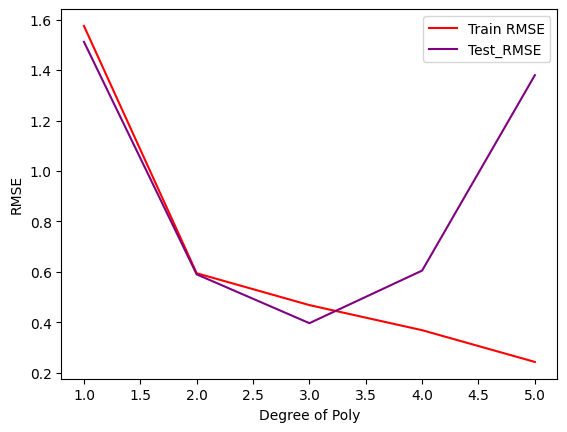

In [8]:
plotter.plot(range(1, 6), train_rmse[: 5], color = "red", label = "Train RMSE");
plotter.plot(range(1, 6), test_rmse[: 5], label = "Test_RMSE", color = "purple");
plotter.ylabel("RMSE");
plotter.xlabel("Degree of Poly");
plotter.legend();

In [10]:
#agree that the best degree is 3, as 4 already shows overfitting
final_poly_converter = PolynomialFeatures(degree = 3, include_bias = False);
final_learner = LinearRegression(n_jobs = 4);
converted_features = final_poly_converter.fit_transform(features);
final_learner.fit(y = labels, X = converted_features);

In [12]:
dump(final_learner, "C://Users//omoke//Desktop//Scratches//FinalModel.joblib");
dump(final_poly_converter, "C://Users//omoke//Desktop//Scratches//PolynomialConverter");

In [14]:
test = load("C://Users//omoke//Desktop//Scratches//PolynomialConverter");